5728
4548


/tmp/ipykernel_3677059/2107679991.py:74: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.tight_layout()
/raid/hwding/anaconda3/envs/gpumd/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: AutoMinorLocator does not work on logarithmic scales
  fig.canvas.print_figure(bytes_io, **kw)


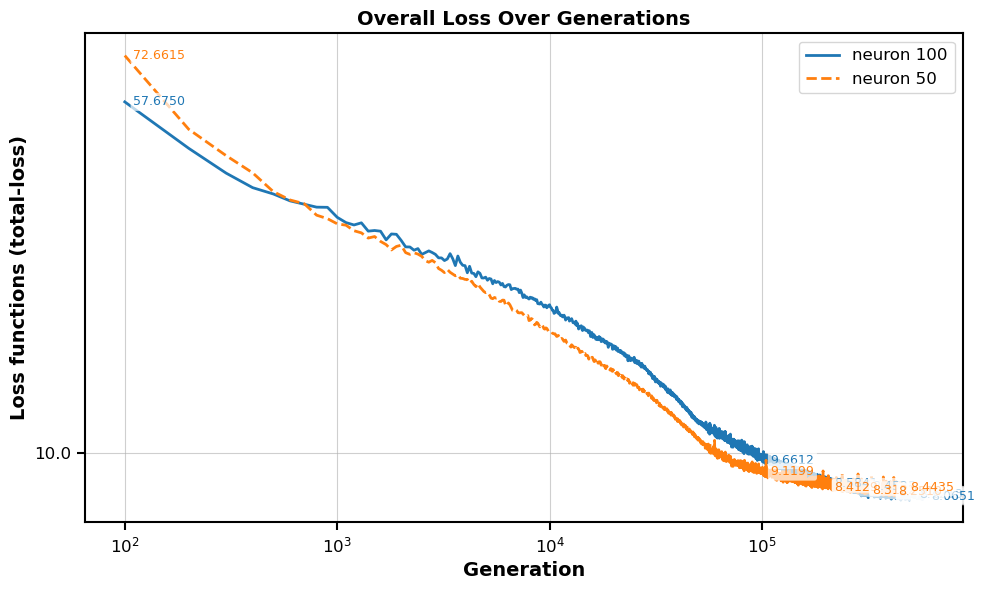

/tmp/ipykernel_3677059/2107679991.py:94: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.tight_layout()


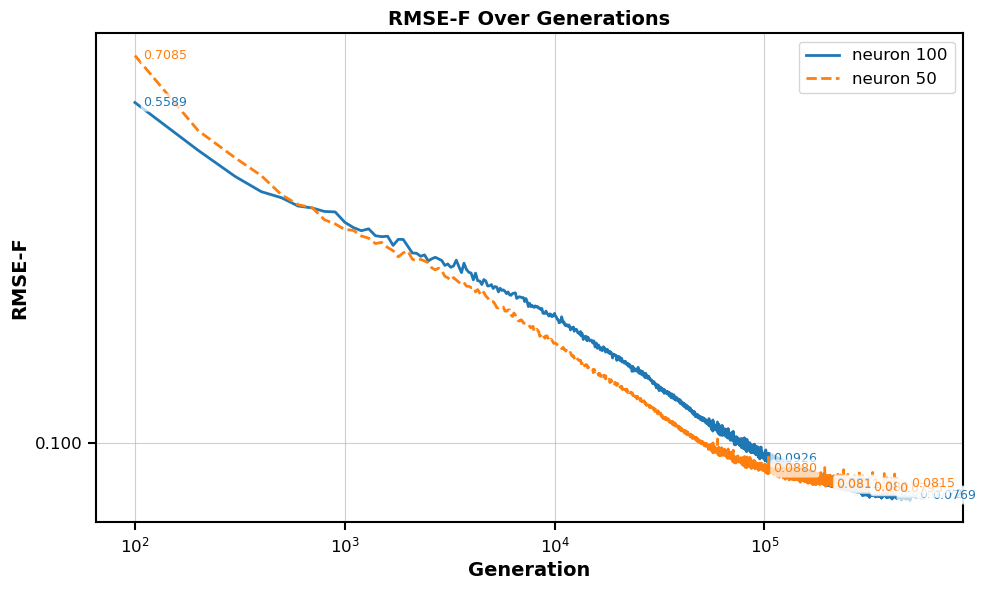

/tmp/ipykernel_3677059/2107679991.py:115: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.tight_layout()


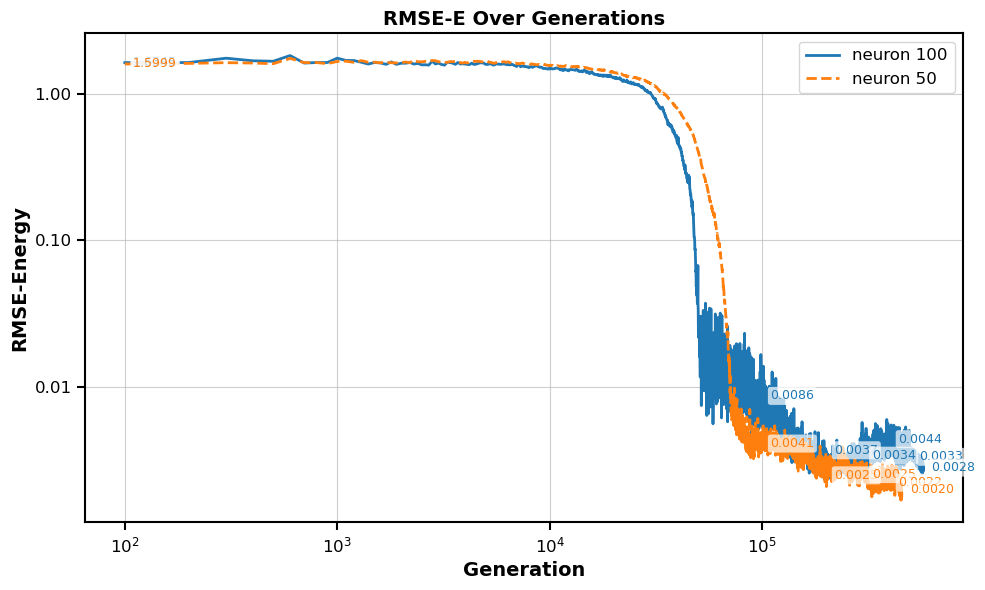

/tmp/ipykernel_3677059/2107679991.py:137: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.tight_layout()


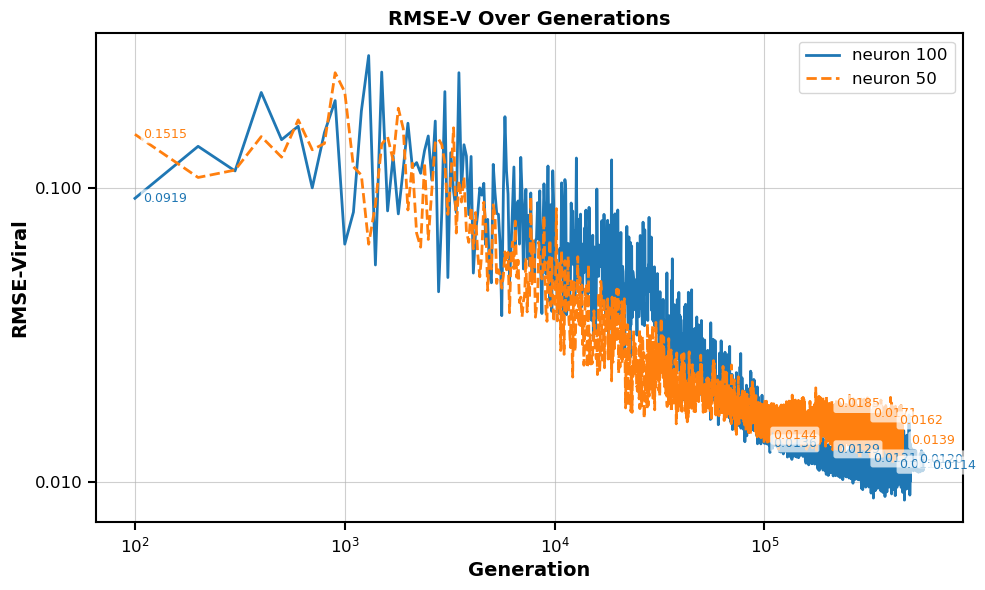

In [ ]:
### 这个是用来读取训练数据与loss图片的东西


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator

paths = ['/raid/hwding/gpumd/train/neuron/100_cutoff_7.5/loss.out',
         'neuron/50_cutoff_7.5/loss.out']

labels = ['neuron 100', 'neuron 50']
colors = ['#1f77b4', '#ff7f0e']  # 可自定义颜色
linestyles = ['-', '--']
annot_interval = 1000  # 每隔多少个点标注一次

def enhance_axis(ax, y_is_log=True):
    ax.set_xlabel('Generation', fontsize=14, fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=10, width=1.0, length=3)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    ax.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.6)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.6, alpha=0.4)
    if not y_is_log:
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
        ax.yaxis.get_major_formatter().set_scientific(False)
    else:
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.yaxis.get_major_formatter().set_powerlimits((-3, 4))

def format_label(val):
    if val == 0:
        return '0'
    mag = abs(val)
    if (mag >= 1e4) or (mag < 1e-3):
        return f'{val:.3e}'
    else:
        return f'{val:.4f}'

def annotate_every_n(ax, x_arr, y_arr, interval, color):
    n = len(x_arr)
    # 选择要标注的索引：0, interval, 2*interval, ..., 最后一个索引
    idxs = list(range(0, n, interval))
    if idxs[-1] != n-1:
        idxs.append(n-1)
    for i in idxs:
        x = x_arr[i]
        y = y_arr[i]
        ax.annotate(format_label(y),
                    xy=(x, y),
                    xytext=(6, 0), textcoords='offset points',
                    fontsize=9, color=color, va='center',
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7, ec='none'))

# 第一张图：Overall Loss（每隔 1000 个点标注）
fig, ax = plt.subplots(figsize=(10,6))
for path, label, color, ls in zip(paths, labels, colors, linestyles):
    try:
        loss = np.loadtxt(path)
        n_rows = loss.shape[0]
        print(n_rows)
        num = 100 * (np.arange(n_rows) + 1)  ## 这里x100的目的是，每隔100步输出数据，所以说表示真正的数据量
        y = loss[:, 1]

        ax.loglog(num, y, ls, linewidth=2.0, color=color, label=label)
        annotate_every_n(ax, num, y, annot_interval, color)
    except Exception as e:
        print(f'Error loading {path} : {e}')

ax.set_ylabel('Loss functions (total-loss)', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
enhance_axis(ax, y_is_log=True)
ax.set_title('Overall Loss Over Generations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 第二张图：RMSE-F（每隔 1000 个点标注）
fig, ax = plt.subplots(figsize=(10,6))
for path, label, color, ls in zip(paths, labels, colors, linestyles):
    try:
        loss = np.loadtxt(path)
        n_rows = loss.shape[0]
        num = 100 * (np.arange(n_rows) + 1)
        y = loss[:, 5]
        ax.loglog(num, y, ls, linewidth=2.0, color=color, label=label)
        annotate_every_n(ax, num, y, annot_interval, color)
    except Exception as e:
        print(f'Error loading {path} : {e}')

ax.set_ylabel('RMSE-F', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
enhance_axis(ax, y_is_log=True)
ax.set_title('RMSE-F Over Generations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 第二张图：RMSE-E（每隔 1000 个点标注）
fig, ax = plt.subplots(figsize=(10,6))
for path, label, color, ls in zip(paths, labels, colors, linestyles):
    try:
        loss = np.loadtxt(path)
        n_rows = loss.shape[0]
        num = 100 * (np.arange(n_rows) + 1)
        y = loss[:, 4]
        ax.loglog(num, y, ls, linewidth=2.0, color=color, label=label)
        annotate_every_n(ax, num, y, annot_interval, color)
    except Exception as e:
        print(f'Error loading {path} : {e}')

ax.set_ylabel('RMSE-Energy', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
enhance_axis(ax, y_is_log=True)
ax.set_title('RMSE-E Over Generations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



# 第二张图：RMSE-V（每隔 1000 个点标注）
fig, ax = plt.subplots(figsize=(10,6))
for path, label, color, ls in zip(paths, labels, colors, linestyles):
    try:
        loss = np.loadtxt(path)
        n_rows = loss.shape[0]
        num = 100 * (np.arange(n_rows) + 1)
        y = loss[:, 6]
        ax.loglog(num, y, ls, linewidth=2.0, color=color, label=label)
        annotate_every_n(ax, num, y, annot_interval, color)
    except Exception as e:
        print(f'Error loading {path} : {e}')

ax.set_ylabel('RMSE-Viral', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
enhance_axis(ax, y_is_log=True)
ax.set_title('RMSE-V Over Generations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator

# 数据路径与元数据
# paths = ['/raid/hwding/gpumd/train/neuron/100_cutoff_7.5/loss.out',
#          'neuron/50_cutoff_7.5/loss.out']

# paths = ['/raid/hwding/gpumd/train/neuron/100_cutoff_7.5/loss.out']
paths = ['/raid/hwding/gpumd/train/advanced/100_cutoff_7.5/loss.out']
labels = ['neuron 100', 'neuron 50']
colors = ['#1f77b4', '#ff7f0e']
linestyles = ['-', '--']
annot_interval = 1000  # 每隔多少个点标注一次

# 替换参数
index_threshold =  1000    # 索引阈值，超过此索引的区间进行替换，因为每隔100步输出一个点，实际是1000*100，这里是1000
averaging_interval = 10    # 在阈值区间，每隔多少个点计算均值，作为替换点

def enhance_axis(ax, y_is_log=True):
    ax.set_xlabel('Generation', fontsize=14, fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=10, width=1.0, length=3)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    ax.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.6)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.6, alpha=0.4)
    if not y_is_log:
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
        ax.yaxis.get_major_formatter().set_scientific(False)
    else:
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.yaxis.get_major_formatter().set_powerlimits((-3, 4))

def format_label(val):
    if val == 0:
        return '0'
    mag = abs(val)
    if (mag >= 1e4) or (mag < 1e-3):
        return f'{val:.3e}'
    else:
        return f'{val:.4f}'

def annotate_every_n(ax, x_arr, y_arr, interval, color):
    n = len(x_arr)
    idxs = list(range(0, n, interval))
    if idxs[-1] != n-1:
        idxs.append(n-1)
    for i in idxs:
        x = x_arr[i]
        y = y_arr[i]
        ax.annotate(format_label(y),
                    xy=(x, y),
                    xytext=(6, 0), textcoords='offset points',
                    fontsize=9, color=color, va='center',
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7, ec='none'))

def replace_and_reindex_complete(x_arr, y_arr, index_threshold=1e5, averaging_interval=10):
    """
    完整替换并重新排序的实现：
    - 保留 index <= index_threshold 的点原样
    - 对 index > index_threshold 的点按 averaging_interval 分块，计算每块的均值 y
      块的 x 值使用“块中点”作为新点的 x，确保新序列在横轴上连续
    - 将高区间原始点删除，只保留均值点
    - 最后返回新序列的新 x、新序列的新 y，以及新的 index 映射
    返回:
        new_x: numpy.ndarray，替换后的 x 序列
        new_y: numpy.ndarray，替换后的 y 序列
        new_index: numpy.ndarray，新的索引序列（从 0 开始）
    """
    x_arr = np.asarray(x_arr, dtype=float)
    y_arr = np.asarray(y_arr, dtype=float)

    n = len(x_arr)
    if n == 0:
        return np.array([]), np.array([]), np.array([])

    start = int(index_threshold)

    # 保留区间数据
    x_keep = x_arr[:min(start, n)]
    y_keep = y_arr[:min(start, n)]

    mean_points_x = []
    mean_points_y = []

    if start >= n:
        new_x = x_keep
        new_y = y_keep
        new_index = np.arange(len(new_x))
        return new_x, new_y, new_index

    # 计算高区间的均值点
    for b in range(start, n, averaging_interval):
        end = min(b + averaging_interval, n)
        if end <= b:
            continue
        y_block = y_arr[b:end]
        x_block = x_arr[b:end]

        mean_y = float(np.mean(y_block))
        mid_x = float((x_block[0] + x_block[-1]) / 2.0)

        mean_points_x.append(mid_x)
        mean_points_y.append(mean_y)

    # 合并并排序
    if len(mean_points_x) > 0:
        new_x = np.concatenate([np.array(x_keep, dtype=float),
                                np.array(mean_points_x, dtype=float)])
        new_y = np.concatenate([np.array(y_keep, dtype=float),
                                np.array(mean_points_y, dtype=float)])
    else:
        new_x = x_keep
        new_y = y_keep

    if len(new_x) > 1:
        sort_idx = np.argsort(new_x)
        new_x = new_x[sort_idx]
        new_y = new_y[sort_idx]

    new_index = np.arange(len(new_x))
    return new_x, new_y, new_index

# ------------------ 绘图实现（带对比） ------------------

# 第一张图：Overall Loss
fig, ax = plt.subplots(figsize=(10,6))
for path, label, color, ls in zip(paths, labels, colors, linestyles):
    try:
        loss = np.loadtxt(path)
        n_rows = loss.shape[0]
        num = 100 * (np.arange(n_rows) + 1)
        y = loss[:, 1]
        # 使用新数据进行替换，并绘制替换后的曲线
        new_x, new_y, new_index = replace_and_reindex_complete(num, y,
                                                               index_threshold=index_threshold,
                                                               averaging_interval=averaging_interval)
        # 当替换后的数据有效时绘制
        if len(new_x) > 0 and len(new_y) > 0:
            ax.loglog(new_x, new_y, marker='o', linestyle='-', color=color, label=f'{label} 替换后')
        annotate_every_n(ax, new_x, new_y, annot_interval, color)
    except Exception as e:
        print(f'Error loading {path} : {e}')


ax.set_ylabel('Loss functions (total-loss)', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
enhance_axis(ax, y_is_log=True)
ax.set_title('Overall Loss Over Generations (对比)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 第二张图：RMSE-F
fig, ax = plt.subplots(figsize=(10,6))
for path, label, color, ls in zip(paths, labels, colors, linestyles):
    try:
        loss = np.loadtxt(path)
        n_rows = loss.shape[0]
        num = 100 * (np.arange(n_rows) + 1)
        y = loss[:, 5]
        # 使用新数据进行替换，并绘制替换后的曲线
        new_x, new_y, new_index = replace_and_reindex_complete(num, y,
                                                               index_threshold=index_threshold,
                                                               averaging_interval=averaging_interval)

        # 当替换后的数据有效时绘制
        if len(new_x) > 0 and len(new_y) > 0:
            ax.loglog(new_x, new_y, marker='o', linestyle='-', color=color, label=f'{label} 替换后')
            # ax.logx(new_x, new_y, marker='o', linestyle='-', color=color, label=f'{label} 替换后')
        annotate_every_n(ax, new_x, new_y, annot_interval, color)
    except Exception as e:
        print(f'Error loading {path} : {e}')


ax.set_ylabel('RMSE-F', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
enhance_axis(ax, y_is_log=True)
ax.set_title('RMSE-F Over Generations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 第三张图：RMSE-E
fig, ax = plt.subplots(figsize=(10,6))
for path, label, color, ls in zip(paths, labels, colors, linestyles):
    try:
        loss = np.loadtxt(path)
        n_rows = loss.shape[0]
        num = 100 * (np.arange(n_rows) + 1)
        y = loss[:, 4]
        # 使用新数据进行替换，并绘制替换后的曲线
        new_x, new_y, new_index = replace_and_reindex_complete(num, y,
                                                               index_threshold=index_threshold,
                                                               averaging_interval=averaging_interval)

        # 当替换后的数据有效时绘制
        if len(new_x) > 0 and len(new_y) > 0:
            ax.loglog(new_x, new_y, marker='o', linestyle='-', color=color, label=f'{label} 替换后')
        annotate_every_n(ax, new_x, new_y, annot_interval, color)
    except Exception as e:
        print(f'Error loading {path} : {e}')


ax.set_ylabel('RMSE-E', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
enhance_axis(ax, y_is_log=True)
ax.set_title('RMSE-E Over Generations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 第四张图：RMSE-V
fig, ax = plt.subplots(figsize=(10,6))
for path, label, color, ls in zip(paths, labels, colors, linestyles):
    try:
        loss = np.loadtxt(path)
        n_rows = loss.shape[0]
        num = 100 * (np.arange(n_rows) + 1)
        y = loss[:, 6]
        # 使用新数据进行替换，并绘制替换后的曲线
        new_x, new_y, new_index = replace_and_reindex_complete(num, y,
                                                               index_threshold=index_threshold,
                                                               averaging_interval=averaging_interval)

        # 当替换后的数据有效时绘制
        if len(new_x) > 0 and len(new_y) > 0:
            ax.loglog(new_x, new_y, marker='o', linestyle='-', color=color, label=f'{label} 替换后')
        annotate_every_n(ax, new_x, new_y, annot_interval, color)
    except Exception as e:
        print(f'Error loading {path} : {e}')


ax.set_ylabel('RMSE-V', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
enhance_axis(ax, y_is_log=True)
ax.set_title('RMSE-V Over Generations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3677059/2201372395.py:171: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.tight_layout()


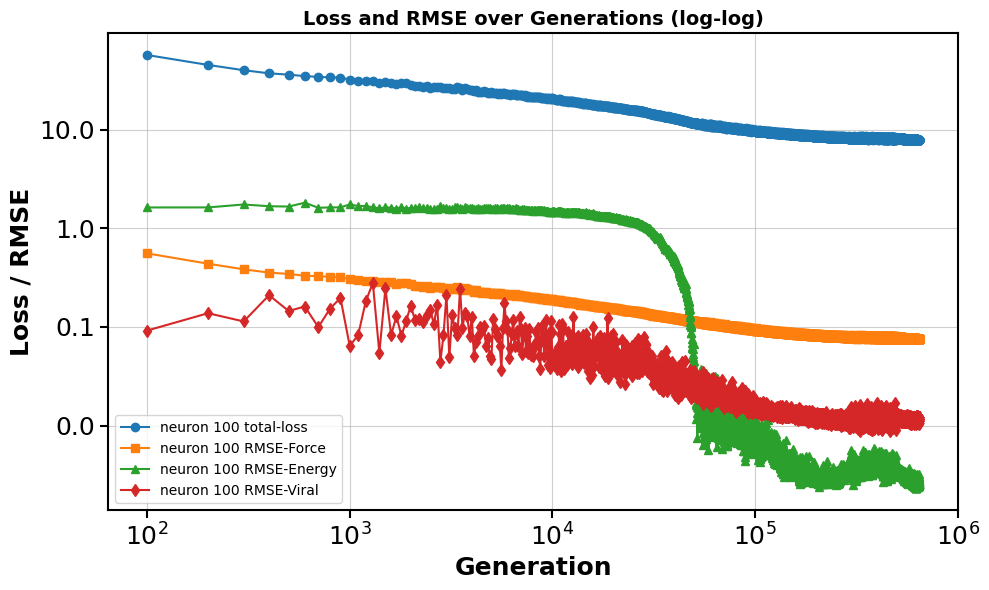

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator

paths = ['/raid/hwding/gpumd/train/advanced/100_cutoff_7.5/loss.out']
labels = ['neuron 100', 'neuron 50']   # 现在只用到第一个
annot_interval = 10000  # 每隔多少个点标注一次

index_threshold = 10000
averaging_interval = 10

def enhance_axis(ax, y_is_log=True):
    ax.set_xlabel('Generation', fontsize=18, fontweight='bold')
    ax.set_ylabel('Loss / RMSE', fontsize=18, fontweight='bold')
    # 把主刻度标签字体调大
    ax.tick_params(axis='both', which='major', labelsize=18, width=1.5, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=14, width=1.0, length=3)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    ax.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.6)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.6, alpha=0.4)
    if not y_is_log:
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
        ax.yaxis.get_major_formatter().set_scientific(False)
    else:
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.yaxis.get_major_formatter().set_powerlimits((-3, 4))

def format_label(val):
    if val == 0:
        return '0'
    mag = abs(val)
    if (mag >= 1e4) or (mag < 1e-3):
        return f'{val:.3e}'
    else:
        return f'{val:.4f}'

def annotate_every_n(ax, x_arr, y_arr, interval, color):
    n = len(x_arr)
    idxs = list(range(0, n, interval))
    if n > 0 and idxs[-1] != n-1:
        idxs.append(n-1)
    for i in idxs:
        x = x_arr[i]
        y = y_arr[i]
        ax.annotate(
            format_label(y),
            xy=(x, y),
            xytext=(6, 0),
            textcoords='offset points',
            fontsize=9,
            color=color,
            va='center',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7, ec='none')
        )

def replace_and_reindex_complete(x_arr, y_arr, index_threshold=1e5, averaging_interval=10):
    x_arr = np.asarray(x_arr, dtype=float)
    y_arr = np.asarray(y_arr, dtype=float)
    n = len(x_arr)
    if n == 0:
        return np.array([]), np.array([]), np.array([])

    start = int(index_threshold)

    x_keep = x_arr[:min(start, n)]
    y_keep = y_arr[:min(start, n)]

    mean_points_x = []
    mean_points_y = []

    if start >= n:
        new_x = x_keep
        new_y = y_keep
        new_index = np.arange(len(new_x))
        return new_x, new_y, new_index

    for b in range(start, n, averaging_interval):
        end = min(b + averaging_interval, n)
        if end <= b:
            continue
        y_block = y_arr[b:end]
        x_block = x_arr[b:end]

        mean_y = float(np.mean(y_block))
        mid_x = float((x_block[0] + x_block[-1]) / 2.0)

        mean_points_x.append(mid_x)
        mean_points_y.append(mean_y)

    if len(mean_points_x) > 0:
        new_x = np.concatenate([np.array(x_keep, dtype=float),
                                np.array(mean_points_x, dtype=float)])
        new_y = np.concatenate([np.array(y_keep, dtype=float),
                                np.array(mean_points_y, dtype=float)])
    else:
        new_x = x_keep
        new_y = y_keep

    if len(new_x) > 1:
        sort_idx = np.argsort(new_x)
        new_x = new_x[sort_idx]
        new_y = new_y[sort_idx]

    new_index = np.arange(len(new_x))
    return new_x, new_y, new_index

# ============ 一张图，四条线 ============

fig, ax = plt.subplots(figsize=(10, 6))

# 对每个 path 画一组曲线（你现在只有一个 path）
for path, net_label in zip(paths, labels):
    try:
        loss = np.loadtxt(path)
        n_rows = loss.shape[0]
        num = 100 * (np.arange(n_rows) + 1)

        # total-loss（原来第 1 列）
        y_total = loss[:, 1]
        x_t, y_t, _ = replace_and_reindex_complete(
            num, y_total,
            index_threshold=index_threshold,
            averaging_interval=averaging_interval
        )
        ax.loglog(x_t, y_t, marker='o', linestyle='-',
                  color='#1f77b4', label=f'{net_label} total-loss')
        # annotate_every_n(ax, x_t, y_t, annot_interval, '#1f77b4')

        # RMSE-F（原来第 5 列）
        y_f = loss[:, 5]
        x_f, y_f_new, _ = replace_and_reindex_complete(
            num, y_f,
            index_threshold=index_threshold,
            averaging_interval=averaging_interval
        )
        ax.loglog(x_f, y_f_new, marker='s', linestyle='-',
                  color='#ff7f0e', label=f'{net_label} RMSE-Force')
        # annotate_every_n(ax, x_f, y_f_new, annot_interval, '#ff7f0e')

        # RMSE-E（原来第 4 列）
        y_e = loss[:, 4]
        x_e, y_e_new, _ = replace_and_reindex_complete(
            num, y_e,
            index_threshold=index_threshold,
            averaging_interval=averaging_interval
        )
        ax.loglog(x_e, y_e_new, marker='^', linestyle='-',
                  color='#2ca02c', label=f'{net_label} RMSE-Energy')
        # annotate_every_n(ax, x_e, y_e_new, annot_interval, '#2ca02c')

        # RMSE-V（原来第 6 列）
        y_v = loss[:, 6]
        x_v, y_v_new, _ = replace_and_reindex_complete(
            num, y_v,
            index_threshold=index_threshold,
            averaging_interval=averaging_interval
        )
        ax.loglog(x_v, y_v_new, marker='d', linestyle='-',
                  color='#d62728', label=f'{net_label} RMSE-Viral')
        # annotate_every_n(ax, x_v, y_v_new, annot_interval, '#d62728')

    except Exception as e:
        print(f'Error loading {path} : {e}')

enhance_axis(ax, y_is_log=True)
ax.set_title('Loss and RMSE over Generations (log-log)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [57]:
import numpy as np
import pandas as pd

# 路径
path = '/raid/hwding/gpumd/prediction/100_cutoff_7.5/force_train.out'

# 使用 NumPy 读取数据
try:
    data_np = np.loadtxt(path)
    print("NumPy读取数据形状:", data_np.shape)
    print("数据前几行:")
    print(data_np[:5])  # 打印前5行进行检查
except Exception as e:
    print(f"NumPy读取失败: {e}")

# 使用 Pandas 读取数据
try:
    data_pd = pd.read_csv(path, delim_whitespace=True, header=None)
    print("Pandas读取数据形状:", data_pd.shape)
    print("数据前几行:")
    print(data_pd.head())  # 打印前5行进行检查
except Exception as e:
    print(f"Pandas读取失败: {e}")

NumPy读取数据形状: (28284143, 6)
数据前几行:
[[ 0.227519    1.52561     0.33371     0.0982367   1.52472     0.180658  ]
 [ 1.66373     0.553746    0.8061      1.78557     0.59129     0.797409  ]
 [ 0.278348   -0.905363   -1.13764     0.339838   -0.78062    -1.24319   ]
 [-3.02729    -0.294404   -1.61792    -2.96482    -0.149142   -1.57453   ]
 [-0.072965    1.51618     0.00393941 -0.128493    1.53569     0.0113915 ]]


/tmp/ipykernel_587306/2076154980.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_pd = pd.read_csv(path, delim_whitespace=True, header=None)


Pandas读取数据形状: (28284143, 6)
数据前几行:
          0         1         2         3         4         5
0  0.227519  1.525610  0.333710  0.098237  1.524720  0.180658
1  1.663730  0.553746  0.806100  1.785570  0.591290  0.797409
2  0.278348 -0.905363 -1.137640  0.339838 -0.780620 -1.243190
3 -3.027290 -0.294404 -1.617920 -2.964820 -0.149142 -1.574530
4 -0.072965  1.516180  0.003939 -0.128493  1.535690  0.011392
